In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# read train  28x28 pixels
train = pd.read_csv('D:\\Downloads\\MNISTtrain\\train.csv')  #D:\Downloads\MNISTtrain\train.csv
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test 
test= pd.read_csv("D:\\Downloads\\MNISTtest\\test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
#label - label of the numbers
Y_train = train["label"] #output - label
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) #except label - all other 784 pixels(28x28)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

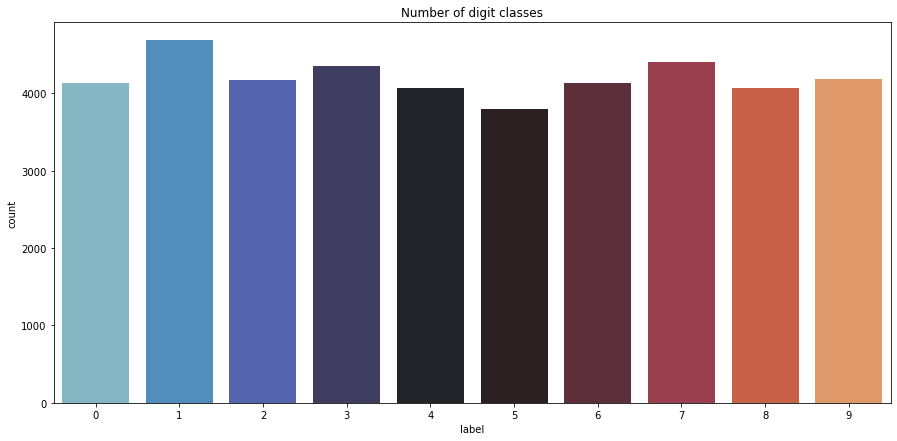

In [5]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire") #seaborn
plt.title("Number of digit classes")
Y_train.value_counts()

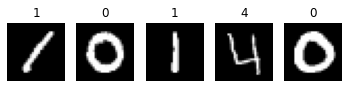

In [6]:
# plotting samples
#img=X_train.iloc[0].as_matrix() as_matrix-converts to numpy representation - deperecated
for i in range(5):
    img = X_train.iloc[i].to_numpy()
    #iloc - position, to_numpy - converts the frame to numpy array representation
    img = img.reshape((28,28)) # converting vector to 28x28
    sp=plt.subplot(1,5,i+1)
    plt.imshow(img,cmap='gray') 
    plt.title(train.iloc[i,0]) #label 
    plt.axis("off")
    sp.axis("off")
plt.show()

In [7]:
# Normalization - reduces the effect of illumination differences
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
#using 10% of train data for validation
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


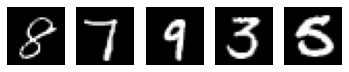

In [11]:
# Some examples
for i in range(5):
    sp=plt.subplot(1,5,i+1)
    plt.imshow(X_train[i][:,:,0],cmap='gray')
    plt.axis("off")
    sp.axis("off")
plt.show()

In [12]:
#convolutional neural network
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# conv -> maxpool -> dropout ->conv->maxpool->dropout->fullyconnected(flatten,dense,dropout,dense)
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1))) #5x5 filter
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #drop 25% of neurons
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected 
model.add(Flatten()) #converting to a vector
model.add(Dense(256, activation = "relu")) #relu
model.add(Dropout(0.5)) #dropout-regularization approach, prevents overfitting
model.add(Dense(10, activation = "softmax")) #softmax - multinomial distribution

In [13]:
#define the optimizer
#adam optimizer - stochastic gradient descent
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 15
batch_size = 250

In [16]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [17]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
151/151 [==============================] - 21s 132ms/step - loss: 1.0540 - accuracy: 0.6472 - val_loss: 0.1815 - val_accuracy: 0.9507
Epoch 2/15
151/151 [==============================] - 18s 117ms/step - loss: 0.4023 - accuracy: 0.8724 - val_loss: 0.1190 - val_accuracy: 0.9674
Epoch 3/15
151/151 [==============================] - 16s 106ms/step - loss: 0.2942 - accuracy: 0.9102 - val_loss: 0.0943 - val_accuracy: 0.9748
Epoch 4/15
151/151 [==============================] - 16s 109ms/step - loss: 0.2448 - accuracy: 0.9236 - val_loss: 0.0805 - val_accuracy: 0.9788
Epoch 5/15
151/151 [==============================] - 19s 123ms/step - loss: 0.2133 - accuracy: 0.9344 - val_loss: 0.0719 - val_accuracy: 0.9800
Epoch 6/15
151/151 [==============================] - 18s 119ms/step - loss: 0.1955 - accuracy: 0.9405 - val_loss: 0.0663 - val_accuracy: 0.9800
Epoch 7/15
151/151 [==============================] - 16s 108ms/step - loss: 0.1755 - accuracy: 0.9446 - val_loss: 0.0634 - val_ac

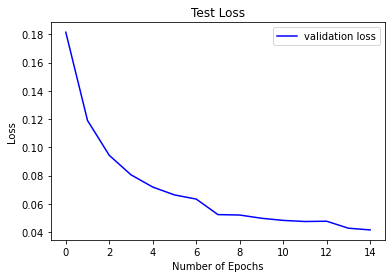

In [18]:
#evaluate the model
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 10ms/step


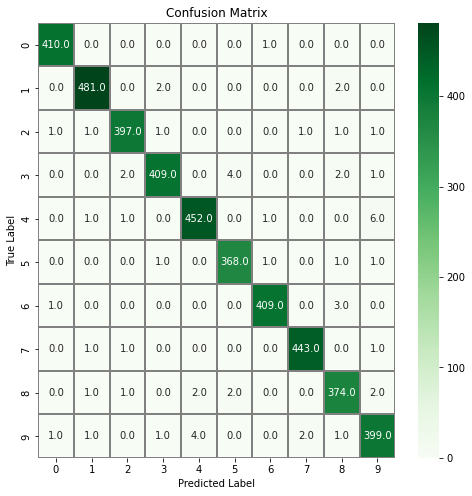

In [19]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#Accuracy
import sklearn.metrics
acc=sklearn.metrics.accuracy_score(Y_true,Y_pred_classes)
print(acc)

0.9861904761904762


1/1 [==============================] - 0s 57ms/step


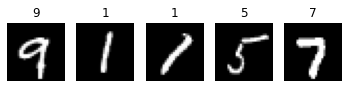

In [21]:
#predictions
start_pred=20
end_pred=25
ts=test[start_pred:end_pred]
ts_pred=model.predict(ts)
ts_pred_classes=np.argmax(ts_pred,axis=1)
ts_pred_classes
for i in range(start_pred,end_pred):
    sp=plt.subplot(1,5,i-start_pred+1)
    plt.imshow(test[i][:,:,0],cmap='gray')
    plt.title(ts_pred_classes[i-start_pred])
    plt.axis("off")
    sp.axis("off")
plt.show()

In [78]:
def f(x):
    temp=x.copy()
    p=model(temp)
    class_name=np.argmax(p,axis=1)
    #return class_name
    return p

In [126]:
class_names=[0,1,2,3,4,5,6,7,8,9]

In [128]:
import shap
# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X_train[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker,output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(test[111:113], max_evals=100, batch_size=50,outputs=shap.Explanation.argsort.flip[:4])


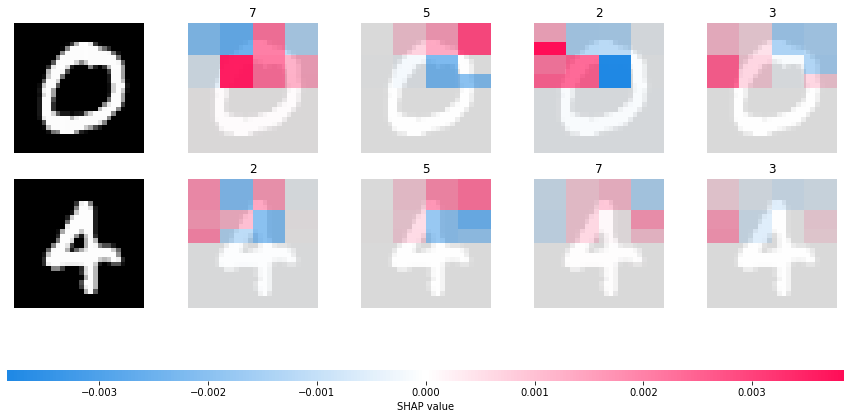

In [129]:
shap.image_plot(shap_values)

In [130]:
masker = shap.maskers.Image("inpaint_ns", X_train[0].shape)
explainer = shap.Explainer(f, masker,output_names=class_names)
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(test[111:113], max_evals=100, batch_size=50,outputs=shap.Explanation.argsort.flip[:4])

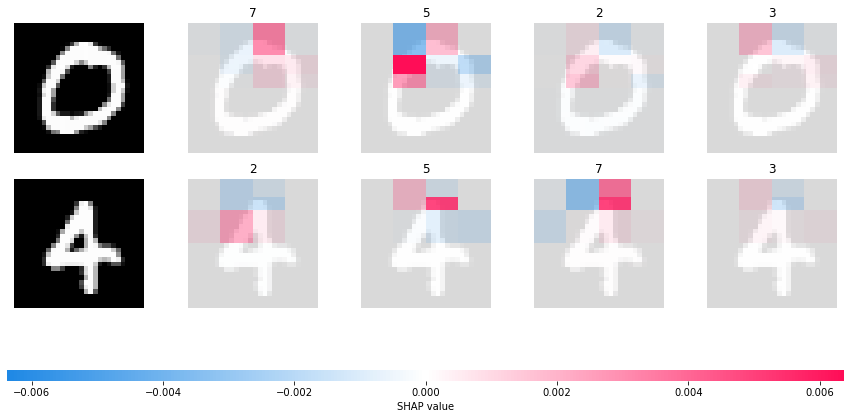

In [131]:
shap.image_plot(shap_values)

In [ ]:
#inpaint_telea and inpaint_ns doesn't work well. blur works well
#partition explainer is implemented here
#it computes owen values

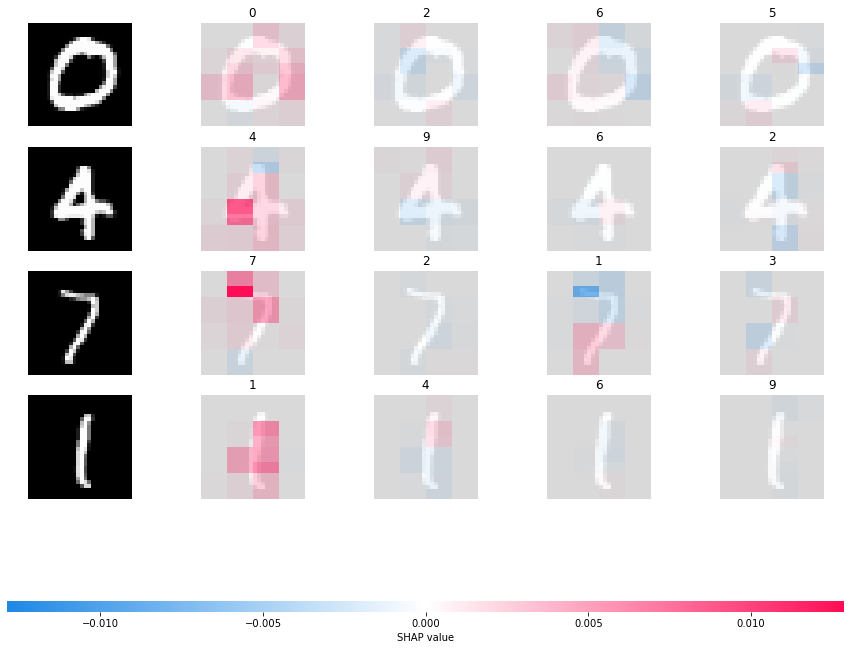

In [133]:
masker = shap.maskers.Image("blur(28,28)", X_train[0].shape)
explainer = shap.Explainer(f, masker,output_names=class_names)
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(test[111:115], max_evals=100, batch_size=50,outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

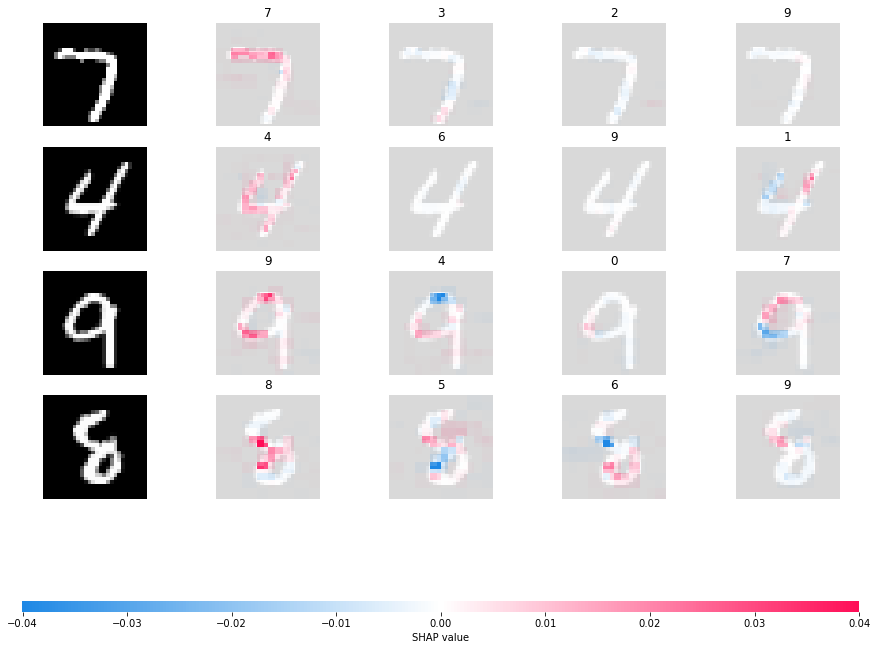

In [134]:
shap_values=explainer(test[41:45],max_evals=5000,batch_size=50,outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

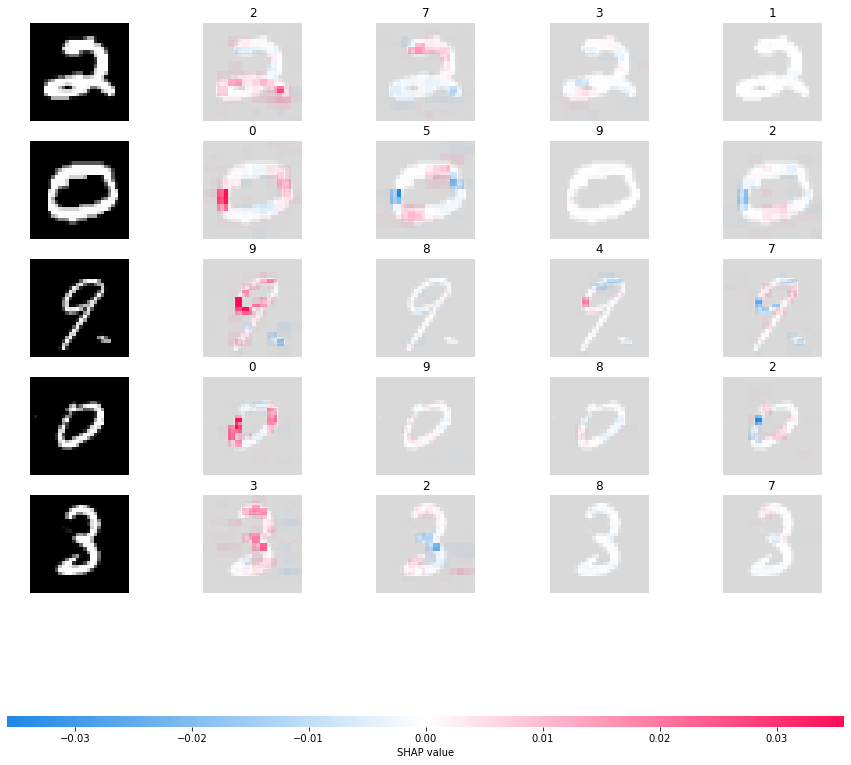

In [135]:
shap_values=explainer(test[0:5],max_evals=5000,batch_size=50,outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

In [22]:
#DeepSHAP is implemented here
#reference image is taken from the training sample 
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(test[0:5])


In [22]:
#kernel SHAP
#from skimage.segmentation import slic
#segments_slic = slic(X_train, n_segments=50, compactness=30, sigma=3)
# segment the image so with don't have to explain every pixel

In [23]:
# define a function that depends on a binary mask representing if an image region is hidden
'''def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out'''
'''def f(z):
    return model.predict(mask_image(z, segments_slic, X_train, 255))'''

In [30]:
# use Kernel SHAP to explain the network's predictions
import shap
explainer_kernel = shap.KernelExplainer(model,X_train,link='logit')
shap_values_kernel = explainer_kernel.shap_values(test[:5]) # runs VGG16 1000 times

Using 37800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AssertionError: Instance must have 1 or 2 dimensions!

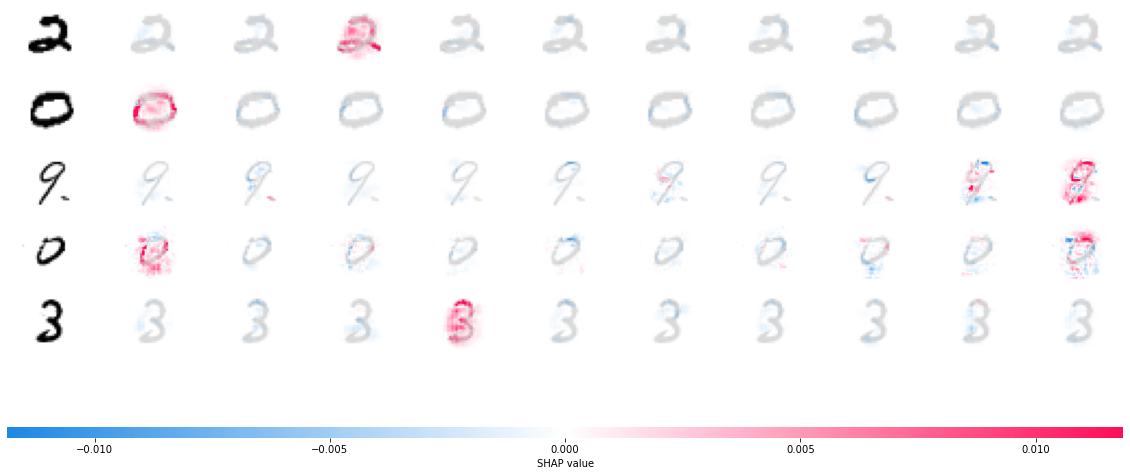

In [23]:
shap.image_plot(shap_values, -test[0:5])

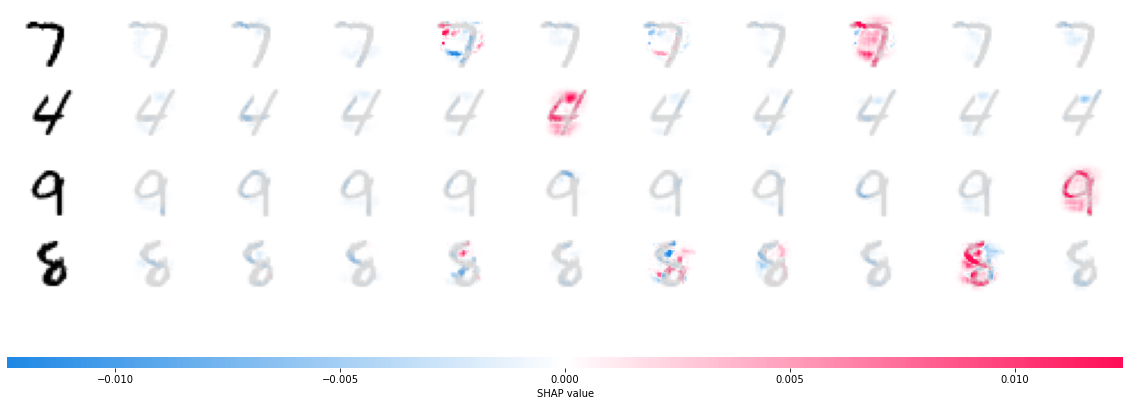

In [24]:
shap_values=e.shap_values(test[41:45])
shap.image_plot(shap_values,-test[41:45])

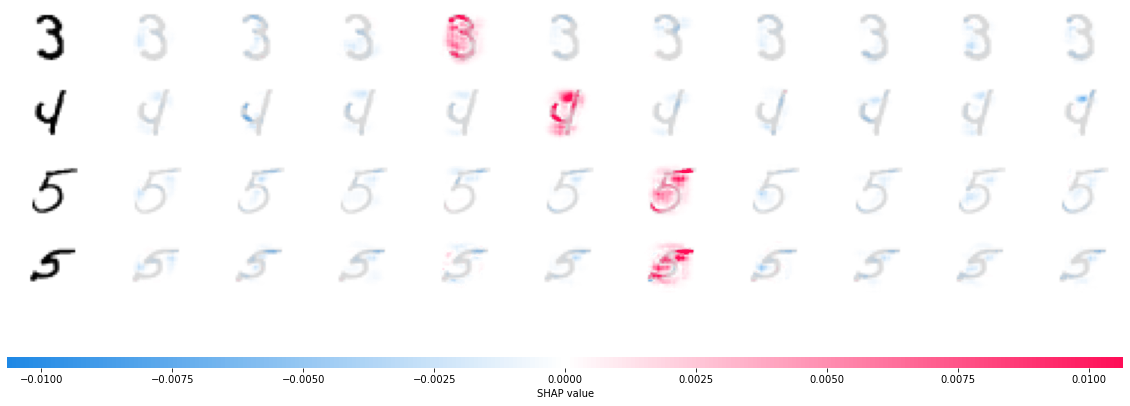

In [25]:
shap_values=e.shap_values(test[141:145])
shap.image_plot(shap_values,-test[141:145])

In [59]:
#more detailed description of backgroud
#visualize the background process -score
#shap.explainer - layer wise, treeshap
#always reference image may not perform better. #deep explainer vs explainer - documentation
#shapexplainer
#shap.deepexplainer
#shap.kernelexplainer
#shap.partitionexplainer
#shap.samplingexplainer
#shap deeplift